<a href="https://colab.research.google.com/github/yiboxu20/MachineLearning/blob/main/homework/HW4/Fall25HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4
## Homework guideline
- The deadline is Nov 7th 11am. Submission after the deadline will not be graded.

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_Xu_Yibo.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point. If your code runs for **too long (over 10 minutes per question)**, points may be deducted.

- Please justify all short answers with a brief explanation. If you use latex command in the markdown, **1 points** bonus will be awarded.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to.

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources. But you
must understand, write, and hand in your own answers. In addition, you must write and submit
your own code in the programming part of the assignment (we may run your code).
If you copy someone else homework solution, both of you may receive ZERO point.

- Colab is preferred. However, if you use Anaconda, please download the .mat file locally and save it to the same folder as this homework file.

**Collaboration:** List the names of all people you collaborated with and for which question(s). This is important!


In [1]:
%pylab inline
import numpy.linalg as LA
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Q1: Finding The Optimal Parking Lots Locations (30pt)
As part of the effort of NYC to make its data publicly available and accessible, the city releases every month the full list of all taxi rides around the city. We will be using the dataset from January 2016, which can be found [here](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

The full dataset includes over 10M taxi rides. In our course, we will be using a smaller subset of this dataset with only 100k rides (which has also been cleaned up a bit). We will start by loading the data and printing the 10 first rows.

In [2]:
!wget https://github.com/yiboxu20/MachineLearning/blob/main/homework/HW4/nyc_taxi_rides.csv?raw=true -O nyc_taxi_rides.csv

--2025-11-14 02:36:42--  https://github.com/yiboxu20/MachineLearning/blob/main/homework/HW4/nyc_taxi_rides.csv?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yiboxu20/MachineLearning/raw/refs/heads/main/homework/HW4/nyc_taxi_rides.csv [following]
--2025-11-14 02:36:42--  https://github.com/yiboxu20/MachineLearning/raw/refs/heads/main/homework/HW4/nyc_taxi_rides.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yiboxu20/MachineLearning/refs/heads/main/homework/HW4/nyc_taxi_rides.csv [following]
--2025-11-14 02:36:42--  https://raw.githubusercontent.com/yiboxu20/MachineLearning/refs/heads/main/homework/HW4/nyc_taxi_rides.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.

In [3]:
dataset = pd.read_csv('nyc_taxi_rides.csv')

## Print the number of rows in the data set
number_of_rows = len(dataset)
print('Number of rows in the dataset: N={}'.format(number_of_rows))

## Show the first 5 rows and last 5 rows
dataset

Number of rows in the dataset: N=100000


,passenger_count,trip_distance,payment_type,fare_amount,tip_amount,pickup_easting,pickup_northing,dropoff_easting,dropoff_northing,duration,day_of_week,day_of_month,time_of_day
0,2,2.768065,2,9.5,0.00,586.996941,4512.979705,588.155118,4515.180889,11.516667,3,13,12.801944
1,1,3.218680,2,10.0,0.00,587.151523,4512.923924,584.850489,4512.632082,12.666667,6,16,20.961389
2,1,2.574944,1,7.0,2.49,587.005357,4513.359700,585.434188,4513.174964,5.516667,0,31,20.412778
3,1,0.965604,1,7.5,1.65,586.648975,4511.729212,586.671530,4512.554065,9.883333,1,25,13.031389
4,1,2.462290,1,7.5,1.66,586.967178,4511.894301,585.262474,4511.755477,8.683333,2,5,7.703333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,3.218680,2,8.0,0.00,586.185469,4513.033744,585.468560,4510.530082,6.400000,4,28,6.925000
99996,5,1.142631,1,4.0,1.32,585.765009,4512.580782,585.200602,4511.590442,1.666667,1,25,5.041667
99997,1,5.471756,2,12.5,0.00,587.498875,4512.905997,591.728405,4512.904235,11.666667,6,9,15.407500
99998,1,3.894603,1,11.5,2.00,589.082301,4511.109238,591.331933,4513.822199,14.383333,5,1,21.158889


In this exercise we will only be interested in the following columns:

- **dropoff_easting** - The horizontal coordinate (east-west) (in UTM-WGS84 (~ in kilometers))
- **dropoff_northing** - The vertical coordinate (north-south) (in UTM-WGS84 (~ in kilometers))

(A full description for each of the other columns can be found [here](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf))

Define the $2\times N$ array $X$ of drop off locations.

In [4]:
X = dataset[['dropoff_easting','dropoff_northing']].values
print('The first 10 rows in X are:\n{}'.format(X[:10, :]))

The first 10 rows in X are:
[[ 588.15511774 4515.18088924]
 [ 584.85048892 4512.63208213]
 [ 585.43418784 4513.17496388]
 [ 586.67153039 4512.55406531]
 [ 585.26247362 4511.75547748]
 [ 585.16897267 4511.54010337]
 [ 588.71017492 4514.20918449]
 [ 585.84396658 4509.54508925]
 [ 583.67108081 4507.73557339]
 [ 587.7012478  4513.70969066]]


The following code plots the map of drop off points. The figure you got resembles the shape of the
streets in NYC: [map](https://www.google.com/maps/@40.7328589,-73.9545177,13z)

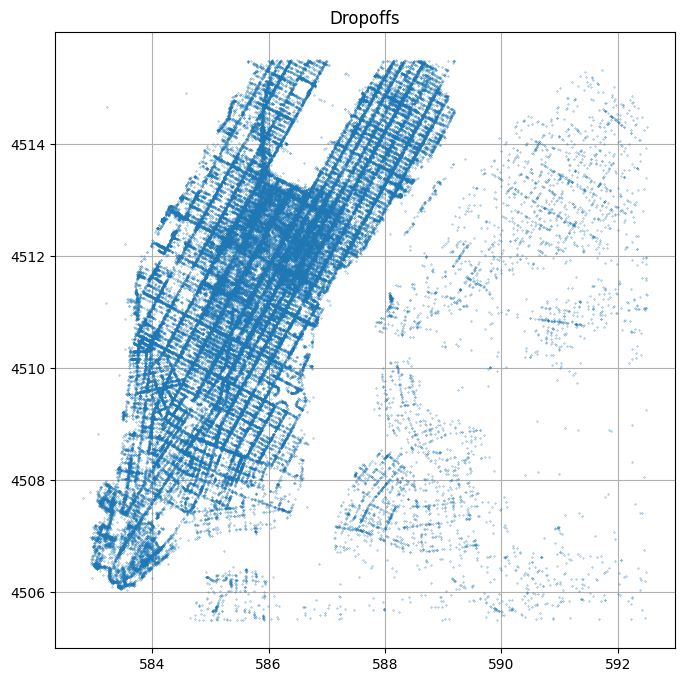

In [5]:
## Plot the map
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.plot(X[:, 0], X[:, 1], '.', markersize=0.5);
ax.set_title('Dropoffs');

<br>

---
---
## Finding The Optimal Parking Lots Locations

A NY taxi company is looking to rent $K$ parking lots so that their taxis can wait in them in between rides.

It would like to select the optimal locations to place these parking lots such that the average distance from the drop off location to the nearest parking lot will be minimal.

---

### Q1.1:  $L_1$ distance (5pt)
In class, we have searched for the best $K$ locations which will minimize the $L_2$ (Euclidean) distances, but actually, in the case of NYC, it makes more sense to minimize the $L_1$ distance.

Write one function which calculates the $L_1$ distance between two vectors.



In [ ]:
def calc_l1_dist(x, y):
  # your code starts here


In [ ]:
## Testing the functions
v1 = np.array([0, 0])
v2 = np.array([3, 0])
v3 = np.array([0, 4])
v4 = np.array([3, 4])
print('L1 norm beteen v1 and v2: {:.2f}'.format(calc_l1_dist(v1, v2)))
print('L1 norm beteen v2 and v3: {:.2f}'.format(calc_l1_dist(v2, v3)))
print('L1 norm beteen v1 and v4: {:.2f}'.format(calc_l1_dist(v1, v4)))


A much more efficient way to calculate all the distances between two lists of vectors would be to use the [cdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html) function from the scipy package. The third parameter of this function define the type of distance which is to be used: *euclidean* for $L_2$ and *cityblock* for $L_1$.


In [6]:
from scipy.spatial.distance import cdist

all_l2_distances = cdist(v, v, 'euclidean')
all_l1_distances = cdist(v, v, 'cityblock')


---
### Q1.2: Rotating the map (10pt)

In order for the L1 distance to actually be the ride distance, we need to rotate the map such that the streets of NYC will be parallel to the axis.

Rotate the array of drop off points $x$ such that:
- The streets of NYC (going from South-East to North-West) will be parallel to the x axis
- The Avenues of NYC (going from South-west to North-East) will be parallel to the y axis.

Do so by constructing a rotation matrix, and multiply $x$ by that matrix to get the rotated drop off points.

Use the following:

- A normalized vector pointing in a direction parallel to the avenues of NYC:

$$
\boldsymbol{e}_1=\left(0.88, -0.47\right)^T
$$

- A normalized vector pointing in a direction parallel to the streets of NYC:
$$
\boldsymbol{e}_2=\left(0.47, 0.88\right)^T
$$

Make sure that that the streets are now more or less aligned to $x$ and $y$ axis.

In [ ]:
#@title Q1.2 your code starts here
rot_mat =
x_rot_train =

## Plot the map
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.plot(x_rot_train[:, 0], x_rot_train[:, 1], '.', markersize=0.5);
ax.set_title('Rotated Dropoffs');

---
### Q1.3: The K-Medians algorithm (15pt)

Similar to the K-Means algorithm, which tries to minimize the sum of squared $L_2$ distances between each point and one of the $K$ centers, there is also a K-Medians algorithm which tries to minimize the sum of $L_1$ distances.

As we saw for the case of the $L_2$, the center point which minimizes the sum of squared $L_2$ distances from a given set of points, is the **mean** point of the given points.

Equivalently, the center point which minimizes the sum of $L_1$ distances from a given set of points is the point which is **median** (in each one of the axis) of the given points.

### The Algorithm

The K-Medians algorithm differs from the K-means algorithm in the following way:

1. The assignment of each point the nearest center will now be based upon the $L_1$ distance instead of the $L_2$ distance.
2. The center will be now calculated using the Median value insted of Mean value.

(a) **Modify K-means code** so that it will implement the K-Medians algorithm with $K=5$. You may use `cdist` to speed up the calculation.

(b) Write a separate function to plot the clusters.

**Note: you should not change the majority of the following code!!**

In [ ]:
# please modify the following code to be k-medians method

def my_kmedians(X, K, max_iter=100):
  # step 0
  centroids = X.copy()
  random.shuffle(centroids)
  centroids = centroids[:K]

  distortion_list = []
  for i in range(max_iter):
    # step 1
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    distortion_list.append(sum(np.min(distances, axis=0)))
    closest   = argmin(distances, axis=0)
    centroids_old = centroids
    # step 2
    centroids = array([X[closest==k].mean(axis=0) for k in range(K)])
    # step 3
    if sum(centroids-centroids_old) == 0.:
     # print('Number of iteration is ', i+1)
      break

  return centroids, closest, distortion_list

In [ ]:
# this code is to plot clusters
def plot_clusters(X, closest, parking_lots_locations):

    fig, ax = plt.subplots(figsize=(4, 4))
    for i_cluster in range(len(parking_lots_locations)):
        cluster_indices = closest == i_cluster
        ax.plot(X[cluster_indices, 0], X[cluster_indices, 1], '.', markersize=1)
    ax.plot(parking_lots_locations[:, 0], parking_lots_locations[:, 1], 'xk', markersize=10)[0]
    ax.grid(True)

In [ ]:
# Your code starts here


---
---


# Q2: Finding The Optimal Number of Parking Lots (20pt)



Now let us address the topic of selecting the number of parking lots (the number of clusters)

Basically, to reduce the average ride distance we would like as much parking lots as possible, but in practice operating a parking lots cost money. Let us assume that:

1. The price of operating a parking lot is $10k per month.

2. There will be exactly 100k rides to the parking lots per month.

3. The estimated price per kilometer for when driving to the parking is estimated at $3 / kilometer.

Basically, we would now like to minimize the following risk function, which is the monthly cost (in k$) of operating the parking lots plus the cost of driving to them:

$$
\hat{R}\left(\left\{\boldsymbol{c}_i\right\}, K\right)= 10\cdot K+3 \cdot 100\cdot\frac{1}{N}\sum_{i=1}^K\sum_{\boldsymbol{x}_j\in S_i}\left\lVert\boldsymbol{x}_j-\boldsymbol{c}_i\right\rVert_1
$$

Where:

- $K$ is the number of parking lots.
- $\left\{\boldsymbol{c}_i\right\}$ is the locations of the $K$ parking lots.
- $N$ is the number of rides in the dataset.
- $\left\{\boldsymbol{x}_i\right\}$ is the set of dropping points in the data set.
- $S_i$ is the set of dropping points which are assigned to the $i$-th parking lot.


---



### Q2.1: Calculate risk (5pt)
Complete the following code to calculate for calculating the risk function.



In [ ]:
def calc_risk(parking_lots_locations, x, cost_per_parking, cost_per_avarage_distance):
  # you code starts here.
  pass

In [ ]:
cost_per_parking = 10
cost_per_avarage_distance = 300

risk = calc_risk(parking_lots_locations, x_rot_test, cost_per_parking, cost_per_avarage_distance)
print(risk)



---





### Q2.2 Brute force optimization (15pt)

We will find the optimal $K$ simply be checking all the relevant values of $K$. For this case, we will check all $K$'s between 1 and 30.

We will split data (80% train, 20% test) for selecting the optimal $K$.


Complete the following code to split the data and calculate the risks for $K=1,2,3,...,30$.

- For each $K$, use the training data to find the $K$ parking lots locations.

- Use the test dataset to calculate the risk.


In [ ]:
# your code starts here.


<br>

---
---

# Q3: Gaussian Mixture Models (40pt)
### Q3.1 KL divergence (5pt)
In class, we defined the **Kullback-Leibler divergence** (or **KL divergence** for short) between two probability distributions $q$ and $p$,
$$ \text{KL}(q||p)=\sum_{z=1}^K q(z) \log\left( \frac{q(z)}{p(z)}\right)$$
where $\sum_{z=1}^K q(z)=1$ and $\sum_{z=1}^K p(z)=1$. For simplicity, assume $p(z)>0$ for all $z$.

Please show the following two key properties
- $\text{KL}(q||p)\ge 0$

- $\text{KL}(q||p)=0$ iff $p=q$.


## **Your Answer:**


---

### Q3.2 Construct a function to calculate log likelihood (10pt)
Say you have applied EM algorithm in the Gaussian Mixture model and have found the optimal parameter $\theta^*=\{\pi_c^*, \mu_c^*, \Sigma_c^*\}_{c=1}^K$. Construct a function to calculate the log likelihood $\ell(\theta)$



In [ ]:
#@title  Q3.2 your code starts here
def log_likelihood(X,K,Pi_opt,Mu_opt, Sigma_opt):
  return


---

### Q3.3 Construct a function to calculate Bayesian information criterion (BIC) (5pt)

In Gaussian mixture models, one question is how to choose the number of the cluster $K$. This time we cannot simply use elbow method, instead we will use slightly more complicated criterion, Bayesian information criterion (BIC).

The formula for BIC in Gaussian mixture models is
$$\text{BIC}(K) = ( K-1 + Kd+Kd(d+1)/2)\log(N) -\log(\hat\ell) $$

where
- $d$ is the dimension of observation $\mathbf{x}$,

- $N$ is the number of observation datapoint,

- $\hat\ell$ is the maximized value of the likelihood function of the model, which is the likelihood at the optimal paramter, $\ell(\theta^*)$.

Note models with lower BIC are generally preferred.

Please construct a function to calculate the Bayesian information criterion.


In [ ]:
#@title  Q3.3 your code starts here
def BIC(K,d,N,ell_hat):
  return



---


### Q3.4 Testing with the synthetic dataset (20pt)
Performing Gaussian mixture models over the loop for an increasing number of $K$ from 2 to 6. Note for each $K$, you should run your GMM several times with differnt random initial conditions, to make sure the parameter is not trapped in the local minimum. Plot BIC value vs. the number of the cluster $K$. From the plot, please comment what is the optimal $K$.

(It is always a good habit to start your code for some special $K$, say $K=4$. Make sure your code produces the correct result first, then put it into the loop with different $K$. )

<Figure size 640x480 with 0 Axes>

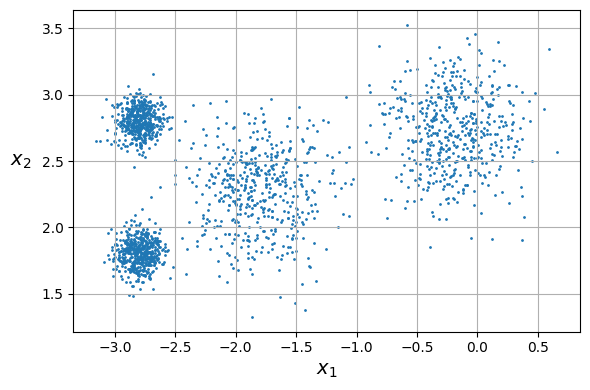

In [11]:
from sklearn.datasets import make_blobs

def plot_clusters(X, y=None, Mu_array=0):
    fig, ax = plt.subplots(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    if sum(Mu_array) != 0:
        plt.scatter(Mu_array[:,0],Mu_array[:,1],marker="x", color="black", linewidth=2)

    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0, labelpad=15)
    plt.grid()
    plt.tight_layout()
    plt.show()


if 1:
    blob_centers = np.array(
        [[ -0.2,  2.75],
         [-1.8 ,  2.3],
         [-2.8,  1.8],
         [-2.8,  2.8]])
    blob_std = np.array([0.3, 0.3, 0.1, 0.1])
    X, y = make_blobs(n_samples=2000, centers=blob_centers,
                      cluster_std=blob_std, random_state=7)

figure()
plot_clusters(X)

In [ ]:
#@title  Q3.4 your code starts here


## **Your Answer:**

---
---
## Description: Face Recognition
In this assignment, we will use K-NN for face recognition. Our task here is to be able to predict the correct label (name of the person) given an image of his face.

We will use PCA for generating features for our classifiers.

For this task, we will use a dataset called [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/), which contains 13233 images of faces which belong to  5749 people. Each image in the dataset is labeled with a number corresponding to a person's name. All the images in the dataset are cropped and resized to the same image size.

To load the data, we will use the scikit-learn's function [sklearn.datasets.fetch_lfw_people](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html). To make our life a bit easier we will only use faces of people which appear in the dataset more than 100 times.

Number of images in the dataset: 1140
Number of different persons in the dataset: 5
Each images size is: (62, 47)


/tmp/ipython-input-4000504738.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(label_to_name_mapping, rotation=-90);


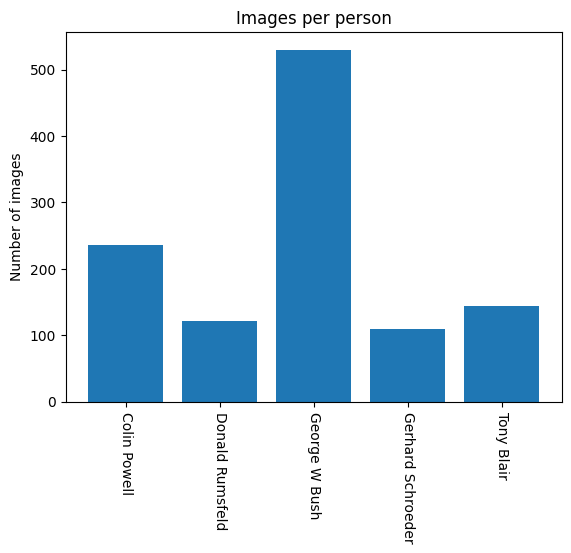

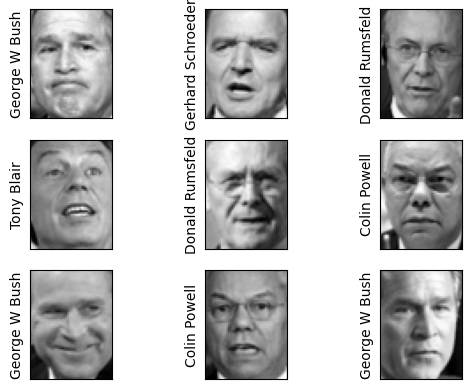

In [12]:
from sklearn.datasets import fetch_lfw_people
dataset = fetch_lfw_people(min_faces_per_person=100)

X = dataset.images
y = dataset.target
label_to_name_mapping = dataset.target_names
image_shape = X[0].shape

print('Number of images in the dataset: {}'.format(len(X)))
print('Number of different persons in the dataset: {}'.format(len(np.unique(y))))
print('Each images size is: {}'.format(image_shape))

_, images_per_class = np.unique(y, return_counts=True)
fig, ax = plt.subplots()
ax.bar(label_to_name_mapping, images_per_class)
ax.set_xticklabels(label_to_name_mapping, rotation=-90);
ax.set_title('Images per person')
ax.set_ylabel('Number of images')


# plots the first 20 images in the dataset.
fig, ax_array = plt.subplots(3, 3)
for i, ax in enumerate(ax_array.flat):
    ax.imshow(X[i], cmap='gray')
    ax.set_ylabel(label_to_name_mapping[y[i]])
    ax.set_yticks([])
    ax.set_xticks([])

In [13]:
from sklearn.model_selection import train_test_split
# split the data into 80% training set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(912, 62, 47)
(228, 62, 47)



---

# Q4: PCA (30pt)
Instead of working directly with the pixels as our input, we would like to select a smaller number of features to use as an input to our classifier.

We will use PCA to represent a given image using a smaller number of variables.

We can also think of this task as trying to compress the image representation.

Currently, each image is represented using 2914 numbers (47 x 62 pixels). Let us try to reduce this number using PCA. This, of course, will come at the cost of not being able to reconstruct the image exactly, but only approximately.

---

### Q4.1: Prepare data (5pt)
In order to use PCA on the images need to store each image as a vector. We will reshape each image to be a 1d vector of size 2914 x 1.


In [ ]:
#@title  Q4.1 your code starts here



---

### Q4.2 Eigenface  (10pt)
(a) Apply the principle component analysis on the dataset and **plot the singular values**.

Each eigenvector has the same dimensionality as the original images, and thus can itself be seen as an image. These principle components (after reshaping into  $47\times 62$ pixels) are therefore called **Eigenfaces**.

(b) Please plot the first nine eigenfaces which corresponding the top nine singular values.

In [ ]:
#@title  Q4.2 your code starts here


---
### Q4.3 Reconstruction images (15pt)
(a) Use one random chosen image as the test, please plot the reconstructed image and error as a function of the number of principle components. You could tell it is reasonable to choose 300 principle components here. In the separate plot, plot $1-\frac{\sum_{i=1}^k \lambda_i}{\sum_{i=1}^D\lambda_i}$ for $k=1$ to $300$, where $\lambda_i$ is $i$-th largest eigenvalue.  

(b) Then please use top 300 principle components (Eigenfaces) to reconstruct all images. This compress the whole dataset at once. Pick any image after the compression and visualize it. Show the effect of PCA by comparing the original image and the PCA images side by side using subplot.

In [ ]:
#@title  Q4.3 your code starts here




Now each image is 300 dimensional instead of 2914 dimensional, without losing lots of information. You can apply all sorts of ML algorithm (classification and clustering) on this 300 dimensional array. This will significantly speed up your learning.

---
---
# Q5: 1-NN classification (30pt)

Try to classify the images in the testing set using 1-nearest neighbor (1-NN) of the training set. Please calculate the misclassification rate.



In [ ]:
#@title  Q5 your code starts here


## **Your Answer**: